In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, sin, cos
from matplotlib import colors as c
from matplotlib import cm
from matplotlib import ticker


plt.rc("font", family="serif", size=16)
plt.rc("mathtext", fontset="cm")
plt.rc("lines", lw=2)

%matplotlib inline


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


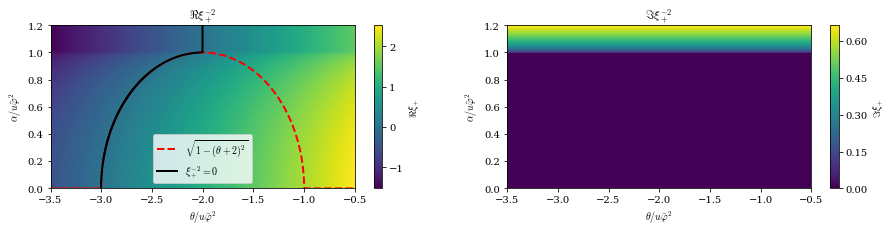

In [14]:
r0 = np.linspace(-3.5, -.5, 1000)
s0 = np.linspace(0, 1.2, 1000)
r, s = np.meshgrid(r0, s0)
l1 = lambda r, s: r + 2 + np.sqrt(1 - s**2 + 0j)
l2 = lambda r, s: r + 2 - np.sqrt(1 - s**2 + 0j)


fig, ax = plt.subplots(1, 2, figsize=(15, 3))

ax[0].plot(r0, np.sqrt(1 - (r0 + 2)**2 + 0j), 'r--', label='$\\sqrt{1 - (\\theta + 2)^2}$')

L = l1(r, s)

si = ax[0].contourf(r, s, L.real, levels=100)
cbar = fig.colorbar(si, ax=ax[0], label='$\\Re \\xi_+$')
tick_locator = ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()


si = ax[1].contourf(r, s, L.imag, levels=100)
cbar = fig.colorbar(si, ax=ax[1], label='$\\Im\\xi_+$')
tick_locator = ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()



k = np.array(L < 0, dtype=int)
a = (k[:, :-1] - k[:, 1:]) != 0 
r1, s1 = r[:, :-1][a], s[:, :-1][a]
ax[0].plot(r1, s1, "k-", label='$\\xi_+^{-2} = 0$')

ax[0].set_xlabel('$\\theta / u \\bar \\varphi^2$')
ax[0].set_ylabel('$\\alpha / u \\bar \\varphi^2$')
ax[0].legend()

ax[1].set_xlabel('$\\theta / u \\bar \\varphi^2$')
ax[1].set_ylabel('$\\alpha / u \\bar \\varphi^2$')
# ax[1].legend()

ax[0].set_title("$\\Re \\xi_+^{-2} $")
ax[1].set_title("$\\Im \\xi_+^{-2} $")

plt.show()
fig.savefig('l1.pdf',bbox_inches='tight')

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


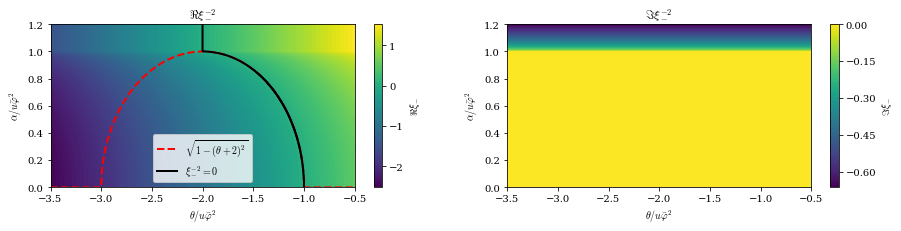

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))

ax[0].plot(r0, np.sqrt(1 - (r0 + 2)**2 + 0j), 'r--', label='$\\sqrt{1 - (\\theta + 2)^2}$')

L = l2(r, s)

si = ax[0].contourf(r, s, L.real, levels=100)
cbar = fig.colorbar(si, ax=ax[0], label='$\\Re \\xi_-$')
tick_locator = ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()

si = ax[1].contourf(r, s, L.imag, levels=100)
cbar = fig.colorbar(si, ax=ax[1], label='$\\Im\\xi_-$')
tick_locator = ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()



k = np.array(L < 0, dtype=int)
a = (k[:, :-1] - k[:, 1:]) != 0 
r1, s1 = r[:, :-1][a], s[:, :-1][a]
ax[0].plot(r1, s1, "k-", label='$\\xi_-^{-2} = 0$')

ax[0].set_xlabel('$\\theta / u \\bar \\varphi^2$')
ax[0].set_ylabel('$\\alpha / u \\bar \\varphi^2$')
ax[0].legend()

ax[1].set_xlabel('$\\theta / u \\bar \\varphi^2$')
ax[1].set_ylabel('$\\alpha / u \\bar \\varphi^2$')
# ax[1].legend()

ax[0].set_title("$\\Re \\xi_-^{-2} $")
ax[1].set_title("$\\Im \\xi_-^{-2} $")

plt.show()
fig.savefig('l2.pdf',bbox_inches='tight')

In [16]:
def rgba_to_hex(rgba):
    red = int(rgba[0] * 255)
    green = int(rgba[1] * 255)
    blue = int(rgba[2] * 255)
    alpha = int(rgba[3] * 255)
    return f"#{red:02x}{green:02x}{blue:02x}{alpha:02x}"

#3a528bff


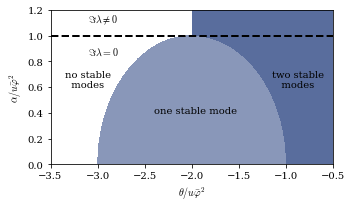

In [17]:
fig, ax = plt.subplots(figsize=(5, 3))

k = .25
color = rgba_to_hex(cm.viridis(k))
print(color)
L = l2(r, s).real
m = L<0
one = np.ones_like(r)
ax.contourf(r, s, np.ma.masked_where(m, one), colors=color,  alpha=.6)

L = l1(r, s).real
m = L<0
one = np.ones_like(r)
ax.contourf(r, s, np.ma.masked_where(m, one),  colors=color, alpha=.6)

ax.plot([-3.5, -.5], [1, 1], 'k--')

ax.text(-1.15, .6, 'two stable\n   modes')
ax.text(-2.4, .4, 'one stable mode')
ax.text(-3.35 , .6, 'no stable\n  modes')
ax.text(-3.1, 1.1, '$\\Im \\lambda \\neq 0 $')
ax.text(-3.1, .85, '$\\Im \\lambda = 0 $')

ax.set_xlabel('$\\theta / u \\bar \\varphi^2$')
ax.set_ylabel('$\\alpha / u \\bar \\varphi^2$')

plt.tight_layout()
plt.show()
fig.savefig('l3.pdf')

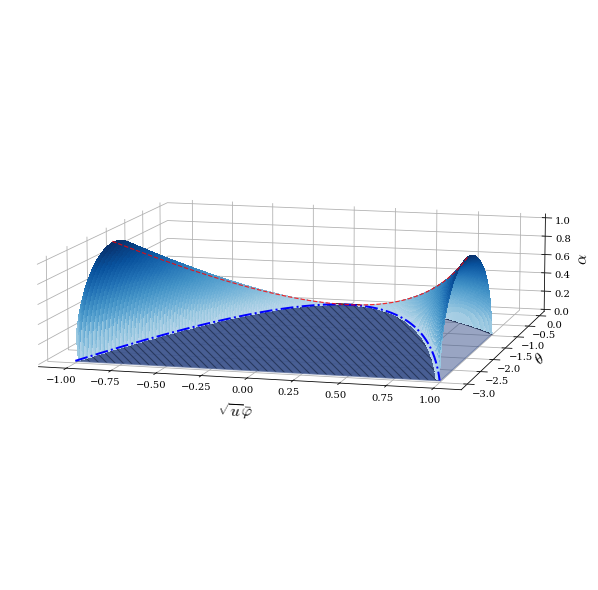

In [7]:
k = 1
N = 200
x0 = np.linspace(-k, k, N)
r0 = np.linspace(-3, 0.001, N)
x, r = np.meshgrid(x0, r0)
a = np.sqrt(x**2**2 - (r + 2*x**2)**2 + 0j).real
# a[0:2]=None
a[0:2]=0
# a

edge = np.zeros_like(a, dtype=bool)
for i in ((0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1), (0, 2), (0, -2), (2, 0), (-2, 0)):
    edge = edge | np.roll(a!=0, i, (0, 1))

a[edge==0]=None
a[0:2]=None


%matplotlib inline
plt.rc("font", family="serif", size=16)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,15))

ax.plot_surface(x, r, a,cmap=cm.Blues, antialiased=False, rstride=1, cstride=1, vmin=-.4, lw=.1, zorder=0)



ax.set_xlabel("\n$\\sqrt{u}\\bar\\varphi$", linespacing=2)
ax.set_ylabel("$\\theta$")
ax.set_zlabel("$\\alpha$")
ax.zaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_box_aspect(aspect = (2,2,.5))

plt.subplots_adjust(top=1, bottom=0, right=0.8, left=0, hspace=0, wspace=1)
save_opt = dict(
    bbox_inches='tight',
    pad_inches = 0, 
    transparent=True, 
    dpi=300
)

ax.azim=-75
ax.elev=10

t = np.linspace(1., -1.01, 1000)
ax.plot(t, -2*t**2, t**2, "r--", alpha=.8, lw=1.2, zorder=11)

k = 1
N = 200
x = np.linspace(-1, 1, N)
r1 = - x**2
r2 = - 3 * x**2

ax.add_collection3d(plt.fill_between(x,r2,-3, color=color,alpha=0.6,label="spinodal", hatch='\\\\\\', linewidth=0.0, edgecolor='#00000000'),0)
ax.add_collection3d(plt.fill_between(x,r1,-3, alpha=0.3, color=color, label="filled plot"),0)


oh = np.zeros_like(x)
ax.plot(x, r1, oh, "k-", label='$\\xi_+ = 0$')
ax.plot(x, r2, oh, "b-.", label='$\\xi_- = 0$', zorder=10)




fig.savefig("surf.pdf", **save_opt)

plt.show()

'a'

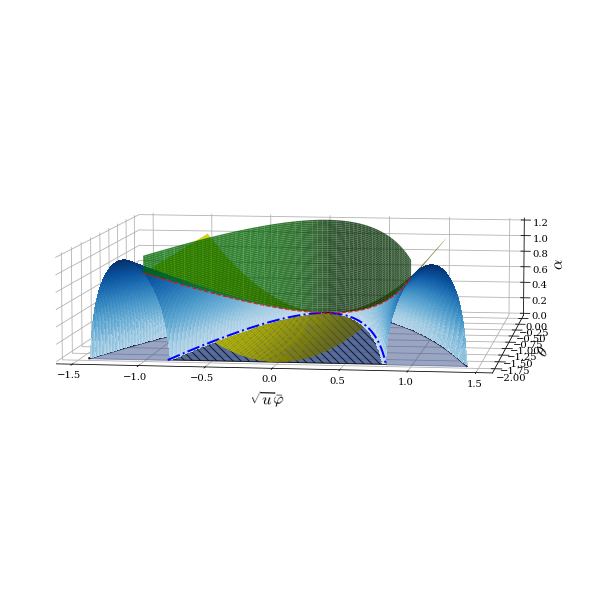

In [8]:
from numpy import sqrt

th = 2
k = sqrt(th)
N = 200
x0 = np.linspace(-k, k, N)
r0 = np.linspace(-th, 0.001, N)
x, r = np.meshgrid(x0, r0)
a = np.sqrt(x**2**2 - (r + 2*x**2)**2 + 0j).real
# a[0:2]=None
a[0:2]=0
# a

edge = np.zeros_like(a, dtype=bool)
for i in ((0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1), (0, 2), (0, -2), (2, 0), (-2, 0)):
    edge = edge | np.roll(a!=0, i, (0, 1))

a[edge==0]=None
a[0:2]=None

plt.rc("font", family="serif", size=16)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,15))





ax.plot_surface(x, r, a,cmap=cm.Blues, antialiased=False, rstride=1, cstride=1, vmin=-.4, lw=.1, zorder=1)



y = k / np.sqrt( 2)

t = np.linspace(y, -y, 1000)
ax.plot(t, -2*t**2, t**2, "r--", alpha=.8, lw=1.2, zorder=11)


N = 200

x1 =  np.sqrt(th / 3)
X1 = np.linspace(-x1, x1, N)
X2 = np.linspace(-sqrt(th), -x1, N)
x = np.concatenate([X2, X1, -X2[::-1]])
r1 = - x**2
r2 = np.concatenate([-th * np.ones_like(X2), -3*X1**2, -th * np.ones_like(X2)])

ax.add_collection3d(plt.fill_between(x, r1, r2, alpha=0.3, color=color),0)
ax.add_collection3d(plt.fill_between(X1, - 3 * X1**2, -th, color=color,alpha=0.6, label="spinodal", hatch='\\\\\\', edgecolor='#00000000'),0)

x = np.linspace(-k,k, N)
oh = np.zeros_like(x)
ax.plot(x, -x**2, oh, "k-", label='$\\xi_+ = 0$')

x = np.linspace(-x1,x1, N)
oh = np.zeros_like(x)
ax.plot(x, -3*x**2, oh, "b-.", label='$\\xi_- = 0$', zorder=10)



def stab(ax):
    N = 200
    z = np.linspace(0, th/2 + 0.2, N)
    x = np.linspace(-k/sqrt(2), k/sqrt(2), N)
    z, x = np.meshgrid(z, x)
    y = - 2 * x**2

    m = z<x**2
    x[m]=None
    y[m]=None
    z[m]=None
    ax.plot_surface(x, y, z, color='green', alpha =.8, zorder=12)
    return ax

stab(ax)



def exc(ax):
    N = 200
    x = np.linspace(-k/sqrt(2), k/sqrt(2), N)
    y = np.linspace(0, -th, N)
    x, y = np.meshgrid(x, y)
    z = x**2

    # m = z<x**2
    # x[m]=None
    # y[m]=None
    # z[m]=None
    ax.plot_surface(x, y, z, color='yellow', alpha =1, zorder=-1)
    return ax

exc(ax)





### Fixes

ax.set_xlabel("\n$\\sqrt{u}\\bar\\varphi$", linespacing=2)
ax.set_ylabel("$\\theta$")
ax.set_zlabel("$\\alpha$")
ax.zaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_box_aspect(aspect = (2,2,.5))

plt.subplots_adjust(top=1, bottom=0, right=0.8, left=0, hspace=0, wspace=1)
save_opt = dict(
    # bbox_inches='tight',
    pad_inches = 0, 
    transparent=True, 
    dpi=300
)

ax.azim=-82
ax.elev=7

fig.savefig("surf3.pdf", **save_opt)

'a'
# plt.show()

In [9]:
np.shape(X2)

(200,)

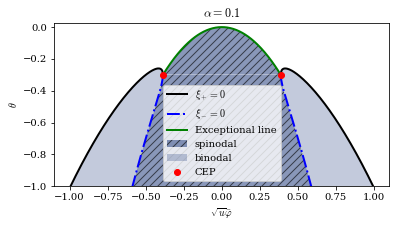

In [18]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 3))

k = 1
N = 200


a = .15
x0 = np.sqrt(a) + 1e-10
x = np.linspace(-1, -x0, N)
r1 = - 2 * x**2 - np.sqrt(x**4 - a**2)
r2 = - 2 * x**2 + np.sqrt(x**4 - a**2)

ax.plot(x, r2, "k-", label='$\\xi_+ = 0$')
ax.plot(x, r1, "b-.", label='$\\xi_- = 0$')
ax.plot(-x, r2, "k-")
ax.plot(-x, r1, "b-.")

x3 = np.linspace(-x0, x0, N)
r3 = -2*x3**2
ax.plot(x3, r3, 'g-', label='Exceptional line')

rr = np.concatenate([r1, r3, r1[::-1]])
xx = np.concatenate([-x, x3, x[::-1]])
ax.fill_between(xx, rr, -1, color=color, alpha=0.6,label="spinodal", hatch='///', linewidth=0.0, edgecolor='#00000000')

ax.fill_between(x,r1,r2, color=color, alpha=0.3, linewidth=0.0, label="binodal")
ax.fill_between(-x,r1,r2, color=color, alpha=0.3, linewidth=0.0, )

ax.plot(x0, -2*x0**2, 'ro', label='CEP')
ax.plot(-x0, -2*x0**2, 'ro')


ax.legend(loc=0)
ax.set_ylabel("$\\theta$")
ax.set_xlabel("$\\sqrt{u} \\bar \\varphi$")
ax.set_ylim(-1, 0.025)
ax.set_xlim(-1.1, 1.1)

ax.set_title("$\\alpha = %.1f$"%a)

fig.savefig('l5.pdf',bbox_inches='tight')

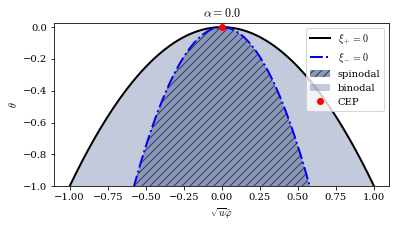

In [11]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 3))

k = 1
N = 200
x = np.linspace(-1, 1, N)
r1 = - x**2
r2 = - 3 * x**2

ax.plot(x, r1, "k-", label='$\\xi_+ = 0$')
ax.plot(x, r2, "b-.", label='$\\xi_- = 0$')

ax.fill_between(x,r2,-1, color=color, alpha=0.6,label="spinodal", hatch='///', linewidth=0.0, edgecolor='#00000000')
ax.fill_between(x,r1,r2, color=color, alpha=0.3,label="binodal", linewidth=0.0)

ax.plot(0, 0, 'ro', label='CEP')
ax.set_title("$\\alpha = %.1f$"%0)

ax.legend(loc=1)
ax.set_ylabel("$\\theta$")
ax.set_xlabel("$\\sqrt{u} \\bar \\varphi$")
ax.set_ylim(-1, 0.025)
ax.set_xlim(-1.1, 1.1)
fig.savefig('l4.pdf',bbox_inches='tight')

In [241]:
import numpy as np
import plotly.offline as ply
import plotly.graph_objs as go
np.set_printoptions(linewidth=1000, precision=1, edgeitems=10, threshold=10000)

k = 1
N = 1000
x0 = np.linspace(-k, k, N)
r0 = np.linspace(-3, 0.001, N)
x, r = np.meshgrid(x0, r0)
a = np.sqrt(x**2**2 - (r + 2*x**2)**2 + 0j).real
# a[0:2]=None
# a[0:2]=0
# a

edge = np.zeros_like(a, dtype=bool)
stencil = ((0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1), (0, 2), (0, -2), (2, 0), (-2, 0))
for i in stencil:
    edge = edge | np.roll(a!=0, i, (0, 1))

a[edge==0]=None
# a[0:2]=None

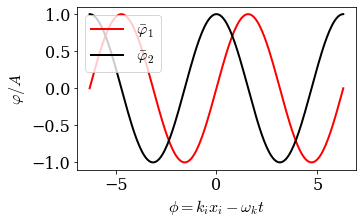

In [242]:
fig, ax = plt.subplots(figsize=(5, 3))

x = np.linspace(-2 * pi, 2 * pi, 200)
ax.plot(x, sin(x), 'r', label='$\\bar \\varphi_1$')
ax.plot(x, cos(x), 'k', label='$\\bar \\varphi_2$')

ax.set_xlabel("$\\phi = k_i x_i - \\omega_k t$")
ax.set_ylabel("$\\varphi/A$")

ax.legend(loc=2)
fig.savefig('waves.pdf',bbox_inches='tight')
plt.show()


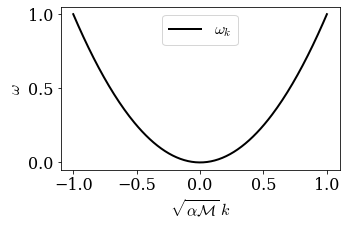

In [85]:
fig, ax = plt.subplots(figsize=(5, 3))

k = np.linspace(-1, 1, 200)
ax.plot(k, k**2, 'k', label='$\\omega_k$')
# ax.plot(x, cos(x), 'k', label='$\\bar \\varphi_2$')

ax.set_xlabel("$\\sqrt{\\alpha \\mathcal{M} }\, k$")
ax.set_ylabel("$\\omega$")
ax.locator_params(axis='y', nbins=3)

ax.legend()
fig.savefig('disp.pdf',bbox_inches='tight')
plt.show()

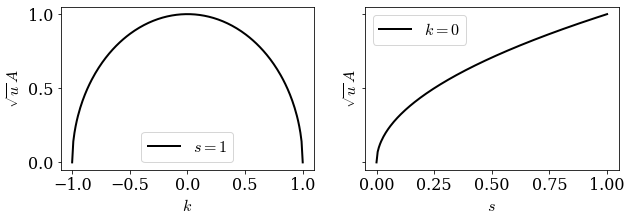

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
# ax2 = ax.sharey(1,1)
# ax = [ax1, ax2]

k = np.linspace(-1, 1, 200)
ax[0].plot(k, np.sqrt(1 - k**2), 'k', label='$s = 1$')
ax[0].set_xlabel("$k$")
ax[0].set_ylabel("$\\sqrt{u} \, A$")
ax[0].locator_params(axis='y', nbins=3)
ax[0].legend()

s = np.linspace(0, 1, 200)
ax[1].plot(s, np.sqrt(s), 'k', label='$k = 0$')
ax[1].set_xlabel("$s$")
ax[1].set_ylabel("$\\sqrt{u} \, A$")
ax[1].legend()
fig.savefig('amp.pdf',bbox_inches='tight')
plt.show()

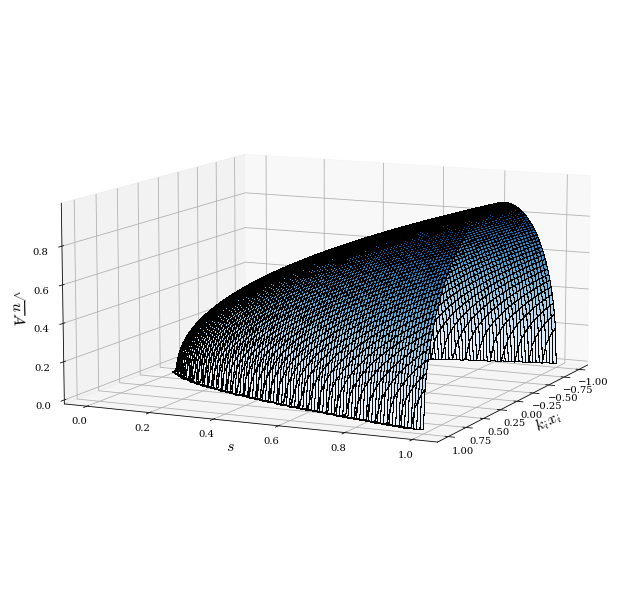

In [45]:
N = 100
k0 = np.linspace(-1, 1, N)
s0 = np.linspace(0, 1, N)
k, s = np.meshgrid(k0, s0)
a = np.sqrt(s - k**2 + 0j).real

a[0:2]=0
edge = np.zeros_like(a, dtype=bool)
stencil = ((0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1), (0, 2), (0, -2), (2, 0), (-2, 0))
for i in stencil:
    edge = edge | np.roll(a!=0, i, (0, 1))
a[edge==0]=None
a[0:2]=None

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,15))

ax.plot_surface(k, s, a,cmap=cm.Blues, antialiased=False, rstride=1, cstride=1, vmin=0, lw=.05, edgecolor='k')


ax.set_xlabel("$k_i x_i$")
ax.set_ylabel("$s$")
ax.set_zlabel("$\\sqrt{u}A$")
ax.zaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

# ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.set_box_aspect(aspect = (1,1,.5))

plt.subplots_adjust(top=1, bottom=0, right=0.8, left=0, hspace=0, wspace=1)
save_opt = dict(
    bbox_inches='tight',
    pad_inches = 0, 
    transparent=True, 
    dpi=300
)

ax.azim=25
ax.elev=10

fig.savefig("surf2.pdf", **save_opt)

plt.show()

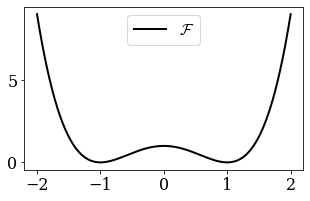

In [8]:
fig, ax = plt.subplots(figsize=(5, 3))

k = np.linspace(-2, 2, 200)
ax.plot(k, (1 - k**2)**2, 'k', label='$\\mathcal{F}$')

# ax.set_xlabel("$\\sqrt{\\alpha \\mathcal{M} }\, k$")
# ax.set_ylabel("$\\omega$")
ax.locator_params(axis='y', nbins=3)

ax.legend()
fig.savefig('disp.pdf',bbox_inches='tight')

plt.show()